In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data_dir='E:\Work\Machine Learning Course\Python\Module 4 Tree Based Models\Data'

In [3]:
os.chdir(data_dir)

In [4]:
hr_data=pd.read_csv('HR_comma_sep.csv')

In [5]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [8]:
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [9]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [10]:
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [11]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [12]:
X=pd.get_dummies(X)

In [13]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)

In [18]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [19]:
clf.score(X_test,y_test)

0.97399999999999998

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [23]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
clf.score(X_test,y_test)

0.97433333333333338

In [25]:
clf.feature_importances_

array([  2.87450338e-01,   1.45559333e-01,   1.76146673e-01,
         1.67553640e-01,   1.48222357e-01,   1.50518546e-02,
         3.89830799e-03,   3.18159390e-03,   6.27434371e-03,
         3.75992486e-03,   1.68631235e-03,   1.58785569e-03,
         0.00000000e+00,   5.42198140e-03,   8.46198616e-05,
         4.54167051e-03,   6.12695186e-03,   1.16284158e-02,
         1.17731292e-02,   5.06965900e-05])

In [26]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

satisfaction_level       0.287450
number_project           0.176147
average_montly_hours     0.167554
time_spend_company       0.148222
last_evaluation          0.145559
Work_accident            0.015052
salary_low               0.011773
salary_high              0.011628
dept_RandD               0.006274
dept_technical           0.006127
dept_product_mng         0.005422
dept_support             0.004542
promotion_last_5years    0.003898
dept_accounting          0.003760
dept_IT                  0.003182
dept_hr                  0.001686
dept_management          0.001588
dept_sales               0.000085
salary_medium            0.000051
dept_marketing           0.000000
dtype: float64

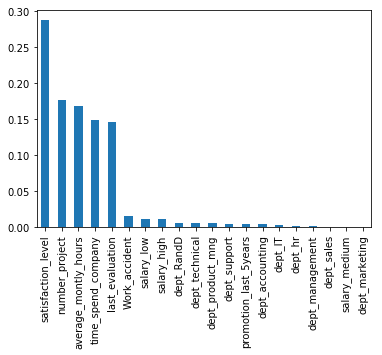

In [27]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

In [28]:
##Partial Dependence Plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence

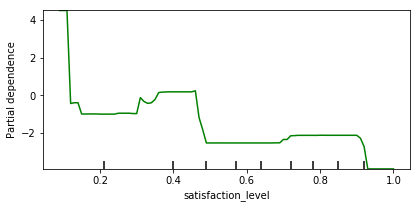

In [29]:
fig,axs=plot_partial_dependence(clf, X, [0],feature_names=X.columns.tolist())